     auhtor_ID                                               post  extrovert
0  t2_2hrxxs28  I have a question, if you have no doctor, how'...          0
1  t2_2hrxxs28  butt to have Covid + your cycle. I'm not sure ...          0
2  t2_2hrxxs28  through different doctors. My situation sucks ...          0
3   t2_4pxpgwz  i thought it was about the pebbleyeet guy the ...          0
4   t2_4pxpgwz  …i always end up voting wrong even as crewmate...          0
(40452, 3)
auhtor_ID    0
post         0
extrovert    0
dtype: int64
Training size:  32361
Validating size:  4045
Testing size:  4046
Training size:  32361
Validating size:  4045
Testing size:  4046
Extrovert train count: 7253
Extrovert val count: 909
Extrovert test count: 920
2.274300405418768
       extrovert
11609          0
28583          0
11596          0
32995          0
9847           1
                                                    post
11609  because its less busy then stanley park and st...
28583  or reply to**. Plea

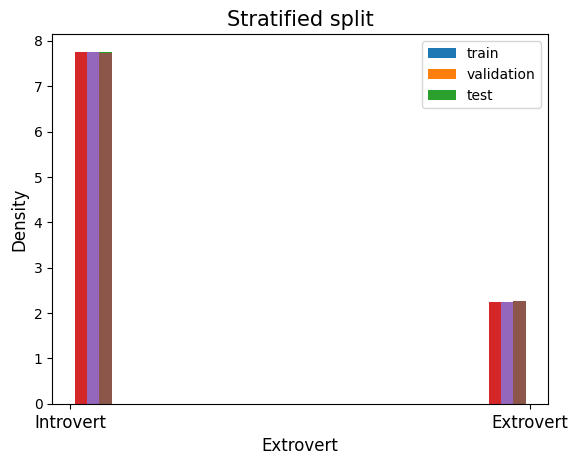

In [1]:
#%% run only once, at the start
#imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#load data
data = pd.read_csv("download/extrovert_introvert.csv")

# %%
#what does the data look like?
print(data.head())
print(data.shape) #(40452, 3)
print(data.isnull().sum()) #no missing data
# %% 
# split dataset 80/10/10 with all sets having equal density int/ex (stratified split)
# use random state for reproducibility
train, val_test = train_test_split(data, test_size=0.2, stratify=data.extrovert, random_state=2026)
val, test = train_test_split(val_test, test_size=0.5, stratify=val_test.extrovert, random_state=2026)

#plot to show equal splits
plt.hist([train.extrovert, val.extrovert, test.extrovert], density=True)
plt.legend(['train', 'validation', 'test'])
plt.title("Stratified split", fontsize=15)
plt.xlabel('Extrovert', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks([0, 1]);

#print size of each set
print("Training size: ", train.shape[0])
print("Validating size: ", val.shape[0])
print("Testing size: ", test.shape[0])
# %%
#next, split randomly 80/10/10
train, val_test = train_test_split(data, test_size=0.2, random_state=2026)
val, test = train_test_split(val_test, test_size=0.5, random_state=2026)

plt.hist([train.extrovert, val.extrovert, test.extrovert], density=True)
plt.legend(['train', 'validation', 'test'])
plt.title("Stratified split", fontsize=15)
plt.ylabel('Density', fontsize=12)
plt.xticks([0, 1], ["Introvert", "Extrovert"], fontsize=12);


#print size of each set
print("Training size: ", train.shape[0])
print("Validating size: ", val.shape[0])
print("Testing size: ", test.shape[0])
print('Extrovert train count: %d'  %(train.extrovert == 1).sum()) 
print('Extrovert val count: %d'  %(val.extrovert == 1).sum()) 
print('Extrovert test count: %d'  %(test.extrovert == 1).sum()) 
print(round(test.extrovert == 1).sum() / len(data) * 100)


 # %%
#we are predicting extrovert/itnrovert = y
X_train = train.drop(['extrovert', 'auhtor_ID'], axis=1).copy()
y_train = train[['extrovert']].copy()

#validation data
X_val = val.drop(['extrovert', 'auhtor_ID'], axis=1).copy()
y_val = val[['extrovert']].copy()

#testing data
X_test = test.drop(['extrovert', 'auhtor_ID'], axis=1).copy()
y_test = test[['extrovert']].copy()

print(y_train.head())
print(X_train)

# %%
#this makes two separate lists for posts from extroverts and introverts
corpus_0 = []
corpus_1 = []
for index, row in data.iterrows():
    if row.extrovert == 0:
        corpus_0.append(row.post)
    else:
        corpus_1.append(row.post)



In [2]:
# Imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

import numpy as np


In [3]:
# Extract text only for ML
X_train_text = X_train["post"].astype(str)
X_val_text   = X_val["post"].astype(str)
X_test_text  = X_test["post"].astype(str)



In [4]:
vectorizer = TfidfVectorizer(
    lowercase=True,         # Convert all characters to lowercase before tokenizing.
    analyzer="word",
    stop_words="english",
    max_features=500,      
    ngram_range=(1, 2)      
)


In [5]:
# Transforming the text into vectors
X_train_vec = vectorizer.fit_transform(X_train_text)
X_val_vec   = vectorizer.transform(X_val_text)
X_test_vec  = vectorizer.transform(X_test_text)

In [6]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)


In [7]:
rf.fit(X_train_vec, y_train)


c:\Users\denis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


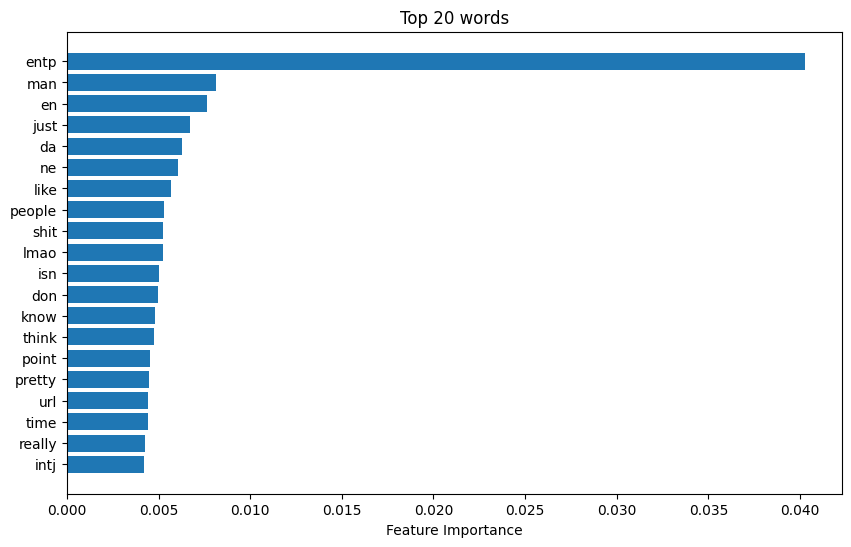

In [8]:

importances = rf.feature_importances_


feature_names = np.array(vectorizer.get_feature_names_out())

# Sort by importance
indices = np.argsort(importances)[::-1]

# Top 20 words
top_n = 20

# Visualization
plt.figure(figsize=(10,6))
plt.title("Top 20 words")
plt.barh(range(top_n), importances[indices[:top_n]][::-1], align='center')
plt.yticks(range(top_n), feature_names[indices[:top_n]][::-1])
plt.xlabel("Feature Importance")
plt.show()


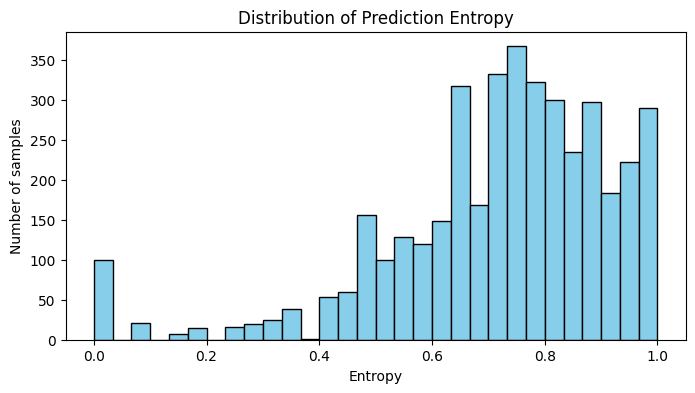

In [9]:
from scipy.stats import entropy

# Get predicted probabilities
probs = rf.predict_proba(X_val_vec)  

# Compute entropy for each sample
# binary case: H = -p*log(p) - (1-p)*log(1-p)
sample_entropy = entropy(probs.T, base=2) 

# Visualization
plt.figure(figsize=(8,4))
plt.hist(sample_entropy, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Prediction Entropy")
plt.xlabel("Entropy")
plt.ylabel("Number of samples")
plt.show()


In [10]:
# Take the first tree in the forest
tree = rf.estimators_[0]


In [11]:
from sklearn.tree import export_text

# Top 20 words
top_features = feature_names[indices[:20]]
print("Top features:", top_features)

# Export text of the tree
tree_rules = export_text(tree, feature_names=list(feature_names))
print(tree_rules)


Top features: ['entp' 'man' 'en' 'just' 'da' 'ne' 'like' 'people' 'shit' 'lmao' 'isn'
 'don' 'know' 'think' 'point' 'pretty' 'url' 'time' 'really' 'intj']
|--- message <= 0.21
|   |--- da <= 0.00
|   |   |--- fuck <= 0.03
|   |   |   |--- shit <= 0.02
|   |   |   |   |--- reports <= 0.10
|   |   |   |   |   |--- dude <= 0.11
|   |   |   |   |   |   |--- work <= 0.05
|   |   |   |   |   |   |   |--- school <= 0.27
|   |   |   |   |   |   |   |   |--- couple <= 0.02
|   |   |   |   |   |   |   |   |   |--- si <= 0.04
|   |   |   |   |   |   |   |   |   |   |--- point <= 0.11
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 66
|   |   |   |   |   |   |   |   |   |   |--- point >  0.11
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |   |   |   |   |   |--- si >  0.04
|   |   |   |   |   |   |   |   |   |   |--- read <= 0.09
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 29
|   |   |   |   |

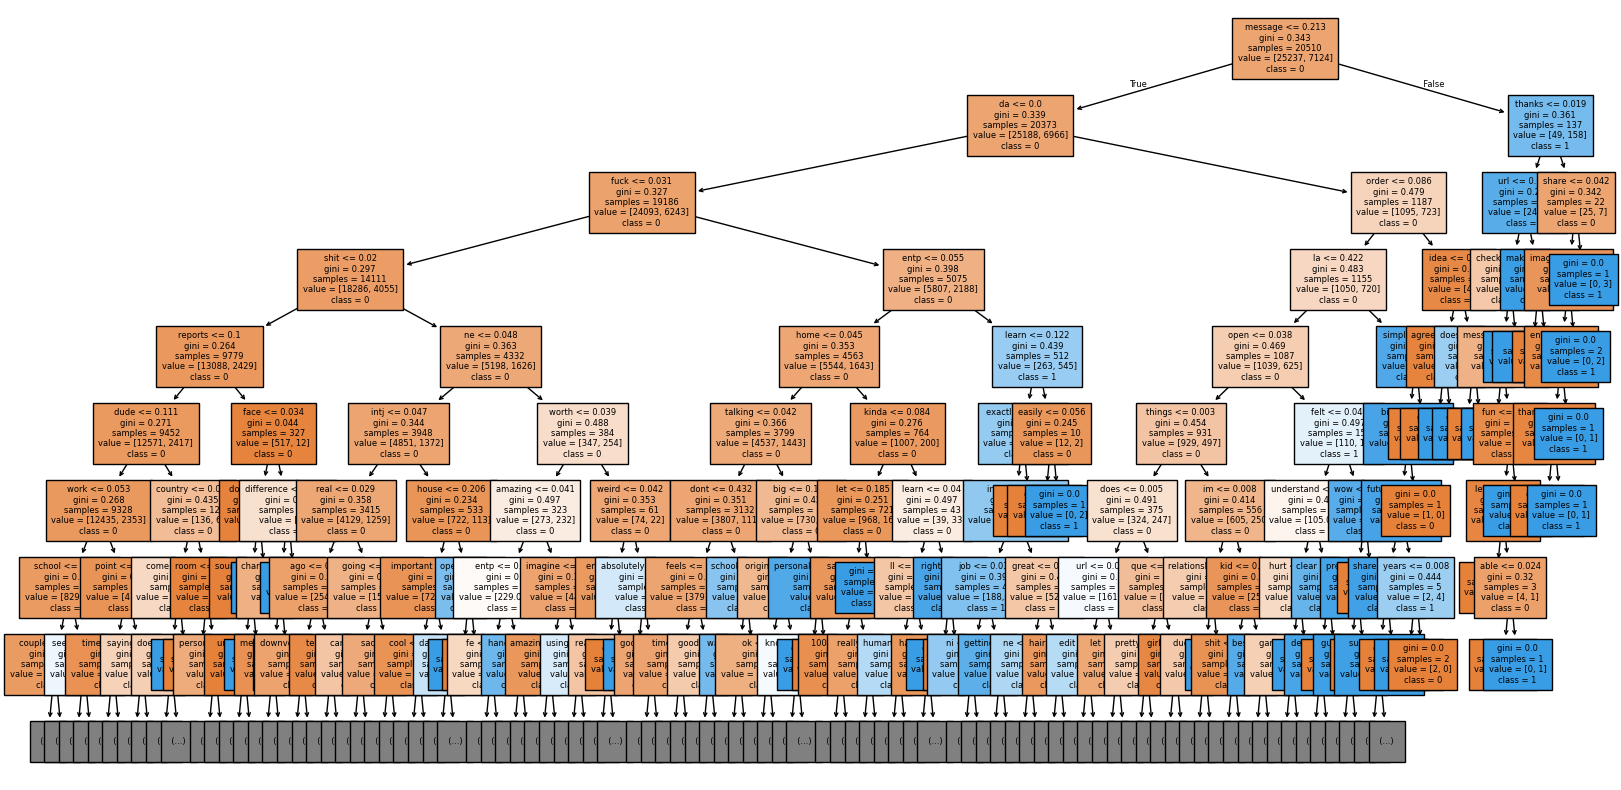

In [12]:
from sklearn import tree as sk_tree

plt.figure(figsize=(20,10))
sk_tree.plot_tree(
    tree, 
    feature_names=feature_names, 
    class_names=['0','1'], 
    filled=True, 
    max_depth=8,      
    fontsize=6
)
plt.show()
